In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/DL_datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train labels

    test_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/DL_datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test labels

    classes = np.array(test_dataset["list_classes"][:]) # list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [ ]:
## afficher les dimensions de la base d'pprentissage, test,

### Votre code ###
m_train = train_set_x_orig.shape[0]
m_test = train_set_x_orig.shape[0]
num_px = train_set_x_orig[1]
### Fin ###
print ("m_train = " + str(m_train))
print ("m_test = " + str(m_test))
print ("longueur/largeur de l'image: num_px = " + str(num_px))
##Afficher les dimensions de tous les données nécessaires à la mise en oeuvre du perceptron
print("taille de chaque image: ("+ str(num_px) + ", "+str(num_px) + ", 3)")
print( "dim de train_set_x: " + str(train_set_x_orig.shape))
print(" dim de train_set_y: "+ str(train_set_y.shape))
print( "dim de test_set_x: " + str(test_set_x_orig.shape))
print(" dim de test_set_y: "+ str(test_set_y.shape))

m_train = 209
m_test = 209
longueur/largeur de l'image: num_px = [[[196 192 190]
  [193 186 182]
  [188 179 174]
  ...
  [ 90 142 200]
  [ 90 142 201]
  [ 90 142 201]]

 [[230 229 229]
  [204 199 197]
  [193 186 181]
  ...
  [ 91 143 201]
  [ 91 143 201]
  [ 91 143 201]]

 [[232 225 224]
  [235 234 234]
  [208 205 202]
  ...
  [ 91 144 202]
  [ 91 144 202]
  [ 92 144 202]]

 ...

 [[ 18  17  15]
  [ 14  14  13]
  [ 29  29  32]
  ...
  [ 83  81  81]
  [ 84  82  83]
  [ 82  81  82]]

 [[ 22  20  18]
  [ 16  15  14]
  [ 25  24  24]
  ...
  [ 82  80  80]
  [ 83  81  82]
  [ 82  81  81]]

 [[ 45  43  39]
  [ 61  59  54]
  [ 81  78  74]
  ...
  [ 83  82  81]
  [ 84  82  82]
  [ 82  80  81]]]
taille de chaque image: ([[[196 192 190]
  [193 186 182]
  [188 179 174]
  ...
  [ 90 142 200]
  [ 90 142 201]
  [ 90 142 201]]

 [[230 229 229]
  [204 199 197]
  [193 186 181]
  ...
  [ 91 143 201]
  [ 91 143 201]
  [ 91 143 201]]

 [[232 225 224]
  [235 234 234]
  [208 205 202]
  ...
  [ 91 144 202]
  

In [ ]:
# Mise en forme

### Votre code###
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
### Fin ###
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [ ]:
## Normalisation des données d'entrées
## Normaliser les image d'apprentissage
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [ ]:
def sig(z):
  a = 1/ (1+np.exp(-z))
  return a

In [ ]:
# tester la fonction sigmoid
print ("sigmoid([0, 2]) = " + str(sig(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [ ]:
def initialisation(dim):
  w = np.zeros([dim,1])
  b = 0.0
  assert(w.shape == (dim,1))
  assert(isinstance(b,float))
  return w, b

In [ ]:
# tester la fonction d'initialisation
dim = 2
W, b = initialisation(dim)
print(("W = "+ str(W)))
print(("b = "+str(b)))

W = [[0.]
 [0.]]
b = 0.0


In [ ]:
# GRADED FUNCTION: propagate
def propagate(w, b, X, Y):
  m = X.shape[0] 
  # Propagation
  V = sig(np.dot(w.T,X) + b)
  cost = -1/m * (np.dot(Y,np.log(V).T) + np.dot((1-Y),np.log(1-V).T))
  # Retropropagation
  dw = 1 / m * (np.dot(X, (V - Y).T))
  db = 1 / m *(np.sum(V - Y))
  assert(dw.shape == w.shape)
  assert(db.dtype == float)
  cost = np.squeeze(cost)
  assert(cost.shape == ()) 
  grads = {"dw": dw,"db": db}
  assert(cost.shape == ())
  return grads, cost

In [ ]:
# test de la fonction propagate
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  costs = []
  for i in range(num_iterations):
    grads, cost = propagate(w, b, X, Y)
    dw = grads["dw"]
    db = grads["db"]
    w = w - learning_rate * dw
    b = b - learning_rate * db
    # enregistrement des coût
    if i % 100 == 0:
      costs.append(cost)
      # affichage du coût chaque 100 instances
    if print_cost and i % 100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
  params = {"w": w,"b": b}
  grads = {"dw": dw,"db": db}
  return params, grads, costs

In [ ]:
#test de la fonction
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost=False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [ ]:
def predict(w, b, X):
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0], 1)
  A = sig(np.dot(w.T,X) + b)
  for i in range(A.shape[1]):
    if(A[0][i] <= 0.5):
      Y_prediction[0][i] = 0
    else:
      Y_prediction[0][i] = 1
  #assert(Y_prediction.shape == (1,m))
  return Y_prediction

In [ ]:
#test de la fonction
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
  # initialisation
  w, b = initialisation(X_train.shape[0])
  # Gradient descendent
  parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
  # extraction de w et b
  w = parameters["w"]
  b = parameters["b"]
  # Prediction test/apprentissage
  Y_prediction_test = predict(w, b, X_test)
  Y_prediction_train = predict(w, b, X_train)
  # Affichage erreur de prédiction
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train))))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test))))
  d = {"costs": costs,
      "Y_prediction_test": Y_prediction_test,
      "Y_prediction_train" : Y_prediction_train,
      "w" : w,
      "b" : b,
      "learning_rate" : learning_rate,
      "num_iterations": num_iterations}
  return d

In [ ]:
# tester le modèle
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.003,print_cost= True)

Cost after iteration 0: 0.011789
Cost after iteration 100: 0.011023
Cost after iteration 200: 0.010945
Cost after iteration 300: 0.010874
Cost after iteration 400: 0.010808
Cost after iteration 500: 0.010744
Cost after iteration 600: 0.010684
Cost after iteration 700: 0.010626
Cost after iteration 800: 0.010571
Cost after iteration 900: 0.010518
Cost after iteration 1000: 0.010468
Cost after iteration 1100: 0.010419
Cost after iteration 1200: 0.010372
Cost after iteration 1300: 0.010326
Cost after iteration 1400: 0.010282
Cost after iteration 1500: 0.010239
Cost after iteration 1600: 0.010198
Cost after iteration 1700: 0.010158
Cost after iteration 1800: 0.010118
Cost after iteration 1900: 0.010080
train accuracy: 99.66507177033493 %
test accuracy: 99.36 %


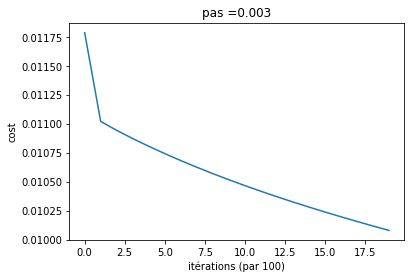

In [ ]:
# figure : évolution du coût
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('itérations (par 100)')
plt.title("pas =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.72248803827752 %
test accuracy: 99.42 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 99.6555023923445 %
test accuracy: 99.34 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 99.6555023923445 %
test accuracy: 99.34 %

-------------------------------------------------------



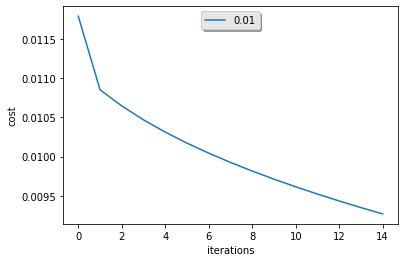

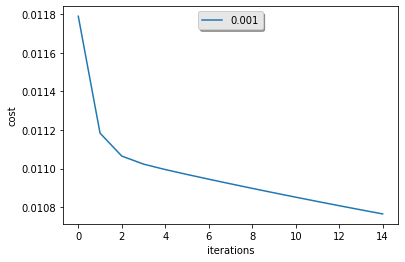

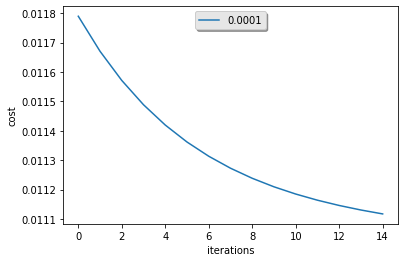

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
  print ("learning rate is: " + str(i))
  models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate=i, print_cost=False)
  print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
  plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
  plt.ylabel('cost')
  plt.xlabel('iterations')
  legend = plt.legend(loc='upper center', shadow=True)
  frame = legend.get_frame()
  frame.set_facecolor('0.90')
  plt.show()

y = 0.0


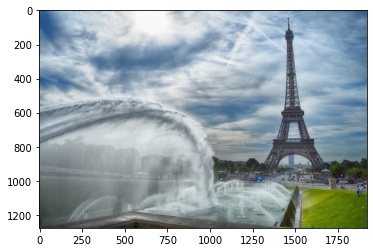

In [ ]:
#télécharger votre image (à enregistrer dans le même répartoire)
my_image = "/content/drive/MyDrive/Colab Notebooks/DL_datasets/im2.jpg"
image = np.array(plt.imread(my_image))
my_image = resize(image, output_shape=(64,64)).reshape((1, 64*64*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)))